## Simple bar-spring system ##
![1d-bar](bar1d.png)

Equilibrium manifold:
$$E(\varepsilon^*) = \{z=(\varepsilon,\sigma) : \sigma+K(\varepsilon-\bar{\varepsilon})=0\}$$
Material data:
$$D = \{ \hat{z}_\alpha = (\hat{\varepsilon}_\alpha,\hat{\sigma}_\alpha), \alpha=1,\ldots,N\}$$

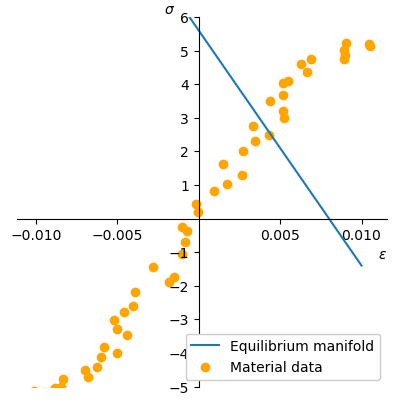

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as np
eps=np.linspace(-0.01,0.01)
K = 700.0
C = 500.0
eps_bar = 0.008
sig_model = lambda e: 750*(e-3.e3*np.power(e,3))
eps_data = np.copy(eps)
sig_data = sig_model(eps)
eps_noise = 1.e-3
sig_noise = 1.e-1
eps_data = eps_data + eps_noise*(2*np.random.random(np.shape(eps_data))-1.)
sig_data = sig_data + sig_noise*(2*np.random.random(np.shape(eps_data))-1.)
fig = pl.figure()
ax = pl.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.set_xticks([-0.01,-0.005,0.005,0.01])
ax.set_xlabel(r'$\varepsilon$',loc='right')
ax.set_ylim([-5,6])
ax.set_yticks([-5.,-4,-3,-2,-1,1.,2,3,4,5,6])
ax.set_ylabel(r'$\sigma$',loc='top',labelpad=-5,rotation='horizontal')
ax.set_box_aspect(1)
pl.plot(eps,K*(eps_bar-eps),label="Equilibrium manifold")
pl.scatter(eps_data,sig_data,label='Material data',c='orange')
ax.legend(framealpha=1.0,loc='lower right')

### Projection of data on equilibrium manifold: $z = P_E(\hat{z})$ ###
$$z = \arg\min_{z \in E} d(z,\hat{z}) 
    = \arg\max_\lambda\min_z \left[ \frac{1}{2} \left(C(\varepsilon-\hat{\varepsilon})^2 
                                               + C^{-1}(\sigma-\hat{\sigma})^2\right) 
                              -\lambda\left(\sigma+K(\varepsilon-\bar{\varepsilon})\right)\right]$$
Stationarity equations:
\begin{aligned}
  \sigma+K(\varepsilon-\bar{\varepsilon})&=0\\
  \varepsilon &= \hat{\varepsilon} + C^{-1} K \lambda \\
  \sigma &= \hat{\sigma}+C\lambda
\end{aligned}
$\Longrightarrow (C+KC^{-1}K)\lambda = K(\bar{\varepsilon}-\hat{\varepsilon})-\hat{\sigma}$

Distance to $E$: 
$$d_E(\hat{z}) = \min_{z\in E} d(z,\hat{z})
    = \frac{1}{2}\left( K C^{-1} K + C \right) \lambda^2
    = \frac{1}{2}\frac{(K(\bar{\varepsilon}-\hat{\varepsilon})-\hat{\sigma})^2}{K C^{-1} K + C}$$

Best data point: $\hat{z} = \arg\min_{\hat{z}} d_E(\hat{z})$

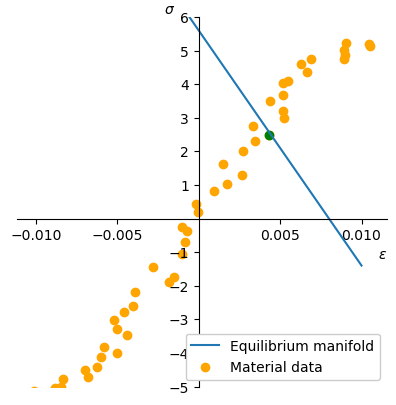

In [2]:
lam = -(sig_data+K*(eps_data-eps_bar))/(C+K*K/C)
dist = 0.5*(C+K*K/C)*lam*lam
idx = np.argmin(dist)
ax.scatter(eps_data[idx],sig_data[idx],c='green')
fig

### Fixed point algorithm ###
$$z = P_E(P_D(z))$$

Let's perform a first projection $z_1 = P_E(\hat{z}_0)$, where $\hat{z}_0$ was arbitrarily chosen in the middle of the database:

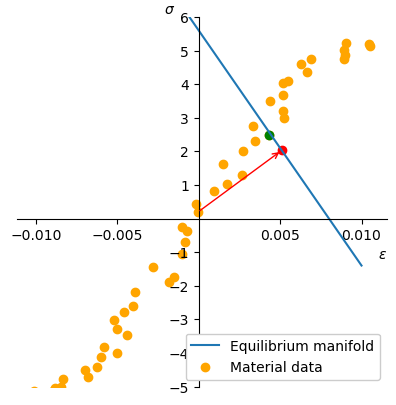

In [3]:
idx_mat = int(eps_data.size/2)
lam = -(sig_data[idx_mat]+K*(eps_data[idx_mat]-eps_bar))/(C+K*K/C)
eps_mech = eps_data[idx_mat]+K*lam/C
sig_mech = sig_data[idx_mat]+C*lam
ax.scatter(eps_mech,sig_mech,c='red')
ax.annotate("",xy=(eps_mech,sig_mech),
            xytext=(eps_data[idx_mat],sig_data[idx_mat]),
            arrowprops=dict(arrowstyle="->",edgecolor="red"))
fig

This is then followed by a projection $\hat{z}_1 = P_D(z_1)$:

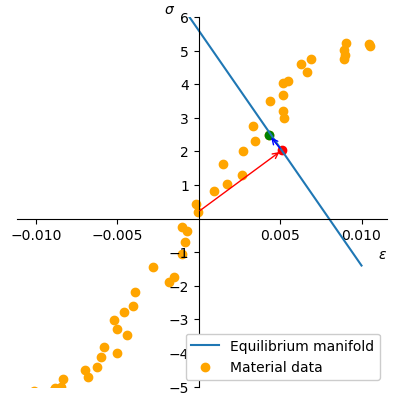

In [4]:
dist=0.5*((eps_data-eps_mech)*C*(eps_data-eps_mech)
         +(sig_data-sig_mech)*(1.0/C)*(sig_data-sig_mech))
idx_new = np.argmin(dist)
ax.annotate("",xy=(eps_data[idx_new],sig_data[idx_new]),
            xytext=(eps_mech,sig_mech),
            arrowprops=dict(arrowstyle="->",edgecolor="blue"))
fig

And a new projection $z_2 = P_E(\hat{z}_1)$:

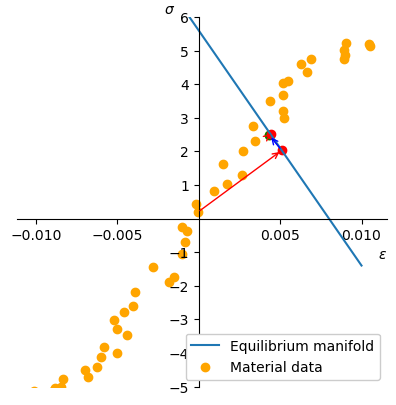

In [5]:
lam = -(sig_data[idx_new]+K*(eps_data[idx_new]-eps_bar))/(C+K*K/C)
eps_mech = eps_data[idx_new]+K*lam/C
sig_mech = sig_data[idx_new]+C*lam
ax.scatter(eps_mech,sig_mech,c='red')
ax.annotate("",xy=(eps_mech,sig_mech),
            xytext=(eps_data[idx_new],sig_data[idx_new]),
            arrowprops=dict(arrowstyle="->",edgecolor="red"))
fig

## Minimization of a constitutive distance

The following constitutive distance can be defined:
$$d_D(z) = \min_{\hat{z}\in D} d(z,\hat{z})$$
which indirectly characterize the constitutive relation.

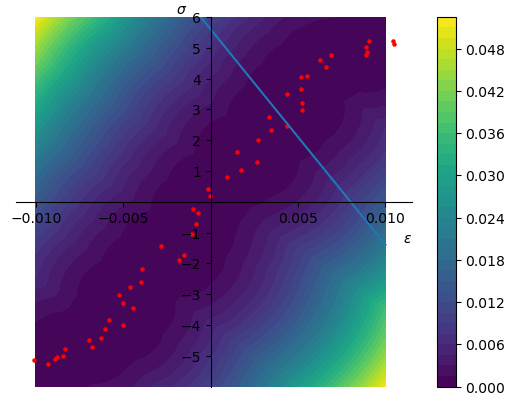

In [6]:
def distance_dd(eps,sig):
  return np.min([0.5*(C*(eps-eps_data[i])**2+(sig-sig_data[i])**2/C) for i in range(eps_data.shape[0])],axis=0)

(e,s) = np.meshgrid(np.linspace(-0.01,0.01,num=201),np.linspace(-6,6,num=201))
fig = pl.figure()
cset = pl.contourf(e,s,distance_dd(e,s),levels=50)
ax = pl.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.set_xticks([-0.01,-0.005,0.005,0.01])
ax.set_xlabel(r'$\varepsilon$',loc='right')
ax.set_ylim([-6,6])
ax.set_yticks([-5.,-4,-3,-2,-1,1.,2,3,4,5,6])
ax.set_ylabel(r'$\sigma$',loc='top',labelpad=-5,rotation='horizontal')
pl.plot(eps,K*(eps_bar-eps),label="Equilibrium manifold")
pl.scatter(eps_data,sig_data,label='Material data',c='red',s=5)
fig.colorbar(cset)

The solution can then be obtained by minimizing the constitutive distance along the equilibrium manifold:
$$z = \arg\min_{z \in E} d_D(z)$$
Note that there may be local minima (due to noisy data).

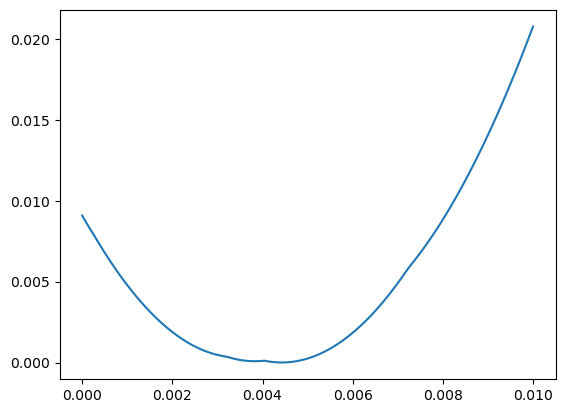

In [7]:
pl.figure()
e = np.linspace(0,0.01,num=100)
pl.plot(e,distance_dd(e,K*(eps_bar-e)))

### Constitutive likelihood